# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Abang Mohammad Syauqi
- **Email:** Syauqi.benaputra1201@gmail.com
- **ID Dicoding:** MC827D5Y1857

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan dari waktu ke waktu?
- Bagaimana distribusi nilai rating pelanggan? Apakah ada outlier pada rating?

## Import Semua Packages/Library yang Digunakan

In [3]:
# Import library dasar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi visualisasi
sns.set(style="whitegrid")
plt.style.use("ggplot")

## Data Wrangling

### Gathering Data

In [4]:
# Load dataset
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_order_items = pd.read_csv("data/olist_order_items_dataset.csv")
df_order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("data/olist_customers_dataset.csv")
df_sellers = pd.read_csv("data/olist_sellers_dataset.csv")
df_products = pd.read_csv("data/olist_products_dataset.csv")
df_category_translation = pd.read_csv("data/product_category_name_translation.csv")
df_geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")

**Insight:**
- analisis pertama yang saya lakukan adalah gathering data, nah disini saya melakukan load pada setiap dataset yang sudah disediakan

In [5]:
# Cek informasi umum dari setiap dataset
datasets = {
    "orders": df_orders,
    "order_items": df_order_items,
    "order_reviews": df_order_reviews,
    "order_payments": df_order_payments,
    "customers": df_customers,
    "sellers": df_sellers,
    "products": df_products,
    "category_translation": df_category_translation,
    "geolocation": df_geolocation
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info())
    print("-" * 50)

Dataset: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
--------------------------------------------------
Dataset: order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ---

**Insight:**
- pada bagian iniya mencari informasi umum dari dataset yang ada, saya gabungkan menjadi satu sehingga tidak perlu lagi memanggil satu persatu dataset yang ada.

In [6]:
for name, df in datasets.items():
    print(f"Dataset: {name}")
    display(df.head())  # Menampilkan 5 baris pertama dari setiap dataset
    print("-" * 50)

Dataset: orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


--------------------------------------------------
Dataset: order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


--------------------------------------------------
Dataset: order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


--------------------------------------------------
Dataset: order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


--------------------------------------------------
Dataset: customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


--------------------------------------------------
Dataset: sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


--------------------------------------------------
Dataset: products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


--------------------------------------------------
Dataset: category_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


--------------------------------------------------
Dataset: geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


--------------------------------------------------


**Insight:**
- saya hanya ingin melihat apakah ada anomali atau kesalahan dalam kolom dan baris yang ditampilkan, meskipun cuma 5 baris saja.

### Assessing Data

In [7]:
for name, df in datasets.items():
    print(f"Missing values di dataset: {name}")
    print(df.isnull().sum())
    print("-" * 50)

Missing values di dataset: orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
--------------------------------------------------
Missing values di dataset: order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
--------------------------------------------------
Missing values di dataset: order_reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
-----------------------------------

**Insight:**
- nah dari sini kita akan memulai assessing data, yang dimana di tahap ini kita akan melakukan pencarian anomali atau missing value atau bahkan duplicated yang ada didalam setiap dataset.

In [8]:
for name, df in datasets.items():
    duplicate_count = df.duplicated().sum()
    print(f"Dataset: {name} → Duplikasi: {duplicate_count}")

Dataset: orders → Duplikasi: 0
Dataset: order_items → Duplikasi: 0
Dataset: order_reviews → Duplikasi: 0
Dataset: order_payments → Duplikasi: 0
Dataset: customers → Duplikasi: 0
Dataset: sellers → Duplikasi: 0
Dataset: products → Duplikasi: 0
Dataset: category_translation → Duplikasi: 0
Dataset: geolocation → Duplikasi: 261831


**Insight:**
- kalau code yang diatas itu untuk melihat missing value, di code ini hanya untuk menampilkan kode duplikasi.

In [9]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

**Insight:**
- nah di kode ini saya hanya ingin memastikan bahwa tipe data yang berhubungan dengan waktu itu di ganti ke datetime, agar saat proses cleaning dapat dengan mudah atau menghindari adanya konflik yang ada

### Cleaning Data

In [31]:
# Menghapus baris dengan order_delivered_customer_date yang kosong karena pesanan belum dikirim
df_orders = df_orders.dropna(subset=['order_delivered_customer_date'])

# Untuk order_approved_at dan order_delivered_carrier_date, kita cek apakah bisa diisi atau dihapus
df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)
df_orders['order_delivered_carrier_date'].fillna(df_orders['order_purchase_timestamp'], inplace=True)

C:\Users\YuQi\AppData\Local\Temp\ipykernel_23120\3284191338.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)
C:\Users\YuQi\AppData\Local\Temp\ipykernel_23120\3284191338.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

**Insight:**
- pada proses cleaning ini, saya hanya menganggap bahwa baris dengan order_delivered_customer_date yang kosong karena pesanan belum dikirim di hapus saja. lalu untuk order_approved_at dan order_delivered_carrier_date, saya akan cek apakah bisa dihapus atau diisi.

In [21]:
df_order_reviews['review_comment_title'].fillna("No Comment", inplace=True)
df_order_reviews['review_comment_message'].fillna("No Comment", inplace=True)

**Insight:**
- disini saya menganggap bahwa user yang memberikan rating kita akan isi dengan teks default seperti "No Comment"

In [22]:
# Menghapus produk yang terlalu banyak missing values
df_products.dropna(subset=['product_category_name'], inplace=True)

# Mengisi nilai numerik dengan median
num_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in num_cols:
    df_products[col].fillna(df_products[col].median(), inplace=True)

C:\Users\YuQi\AppData\Local\Temp\ipykernel_23120\3583690753.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products[col].fillna(df_products[col].median(), inplace=True)
C:\Users\YuQi\AppData\Local\Temp\ipykernel_23120\3583690753.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

**Insight:**
- disini saya menganggap bahwa sebanyak 610 produk memiliki missing values di beberapa kolom kita bisa hapus karena banyak informasi yang hilang. Untuk yang lainnya saya isi dengan median dari data yang ada saja.

In [23]:
df_geolocation.drop_duplicates(inplace=True)

**Insight:**
- tidak ada spesial, tapi untuk duplikasi data saya menghapus saja data yang duplikatnya.

In [27]:
# Cek jumlah missing values setelah cleaning
for name, df in datasets.items():
    print(f"Missing values di dataset: {name}")
    print(df.isnull().sum())
    print("-" * 50)
# Cek jumlah duplikasi data setelah cleaning
for name, df in datasets.items():
    duplicate_count = df.duplicated().sum()
    print(f"Dataset: {name} → Duplikasi: {duplicate_count}")

Missing values di dataset: orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
--------------------------------------------------
Missing values di dataset: order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
--------------------------------------------------
Missing values di dataset: order_reviews
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
--------------------------------------------------
Missing valu

**Insight:**
- ini adalah kondisi ketika semua data nya sudah melalui proses cleaning, sehingga tidak ada lagi dataset yang missing value ataupun terduplikasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
for name, df in datasets.items():
    print(f"Struktur Dataset: {name}")
    print(df.info())
    print(df.head())  # Menampilkan 5 baris pertama
    print("-" * 50)

Struktur Dataset: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e7618

**Insight:**
- eksplorasi data saya hanya memanggil 5 baris setiap dari dataset yang ada, sekedar melihat apakah ada yang salah dari cleaning yang saya lakukan sebelumnya.

In [16]:
for name, df in datasets.items():
    print(f"Distribusi Kategori di {name} Dataset")
    for col in df.select_dtypes(include=['object']).columns:
        print(df[col].value_counts().head(10))  # Menampilkan 10 kategori paling banyak
    print("-" * 50)

Distribusi Kategori di orders Dataset
order_id
66dea50a8b16d9b4dee7af250b4be1a5    1
6ec4642f9993cc34f826cfb9068e5a2f    1
38e9133ce29f6bbe35aed9c3863dce01    1
dfc6eb45a2753ed9e6c6ef4987b44503    1
6f46d42016226f77893ed3978d6903d0    1
f9e3402be5a5ea63344347582ca9f45f    1
1b4a0e6b19d0034b531655b41ea89623    1
788541a19c0791de0504c5a9cb7e7bd5    1
e6cc57f923c4dab2222b8c9aa8742eea    1
c627fe35fce1a754bc5b812d0b8ff379    1
Name: count, dtype: int64
customer_id
edb027a75a1449115f6b43211ae02a24    1
f00bb12620b7b232233cace1b229db18    1
ad312389a098ceff46ce92c4595c06d0    1
a046c690e0564ffde0ce611b5eee2c30    1
3803547f820b1e10b7ad9c7985f06753    1
6f2cf56878f7f82151b0ad02590192c0    1
ce5efd1b1d8a2fa290a871edd5c26cd6    1
a537aaf902d2f436eb7f44817154bb68    1
2f4a42f9bb4b9a8cd402fa549df5c7fd    1
42b0671b440d1f2527bddd8b723e0a0c    1
Name: count, dtype: int64
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing 

**Insight:**
- saya meminta tolong AI untuk bagian ini, jadi AI menyarankan untuk melihat 10 katerogi terbanyak yang ada di datasets.

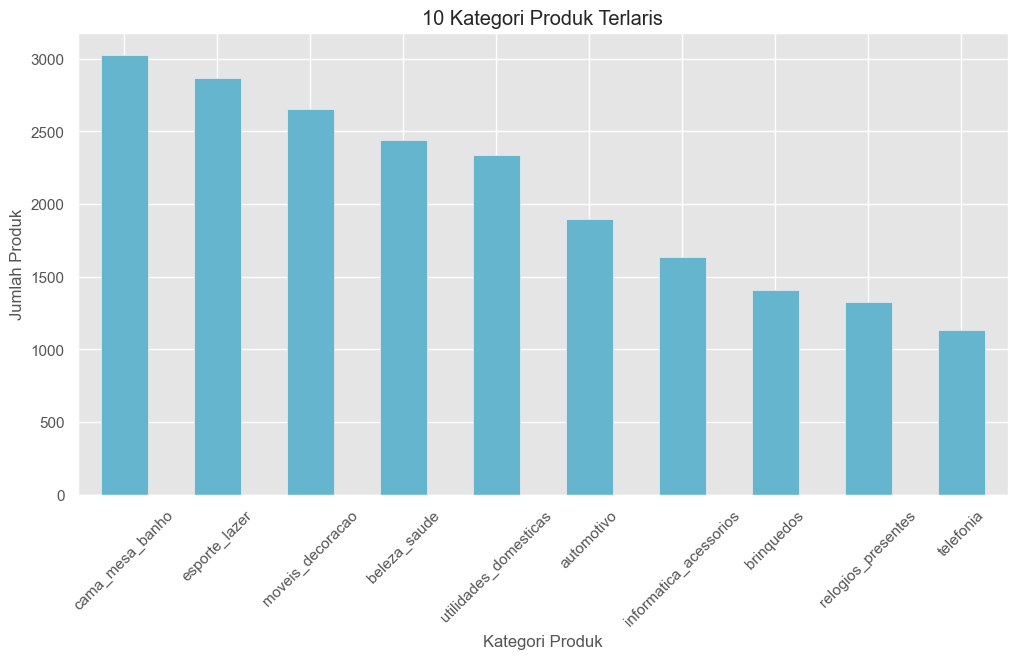

In [17]:
plt.figure(figsize=(12,6))
df_products['product_category_name'].value_counts().head(10).plot(kind='bar', color='c')
plt.title("10 Kategori Produk Terlaris")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Produk")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- saya hanya mengetes visual mengenai 10 kategori yang terbanyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\YuQi\AppData\Local\Temp\ipykernel_23120\1931095267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
C:\Users\YuQi\AppData\Local\Temp\ipykernel_23120\1931095267.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df_orders.set_index('order_purchase_timestamp').resample('M').size()


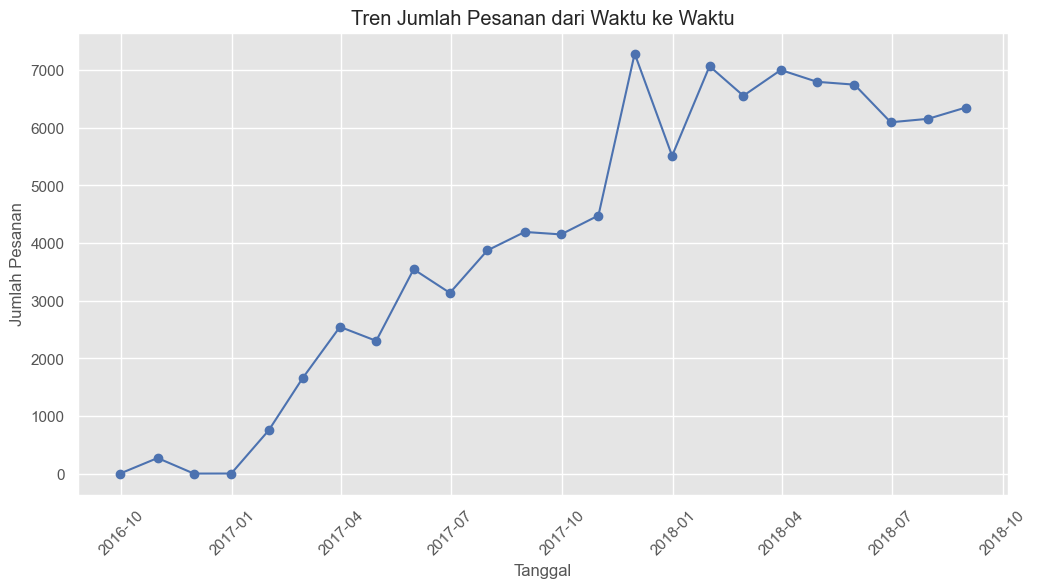

In [18]:
import matplotlib.pyplot as plt

# Konversi timestamp ke datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Resample jumlah pesanan per bulan
monthly_orders = df_orders.set_index('order_purchase_timestamp').resample('M').size()

# Visualisasi dengan Line Chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders, marker='o', linestyle='-', color='b')
plt.title("Tren Jumlah Pesanan dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pesanan")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Pertanyaan saya nomor 1 ini adalah, Bagaimana tren jumlah pesanan dari waktu ke waktu?

### Pertanyaan 2:

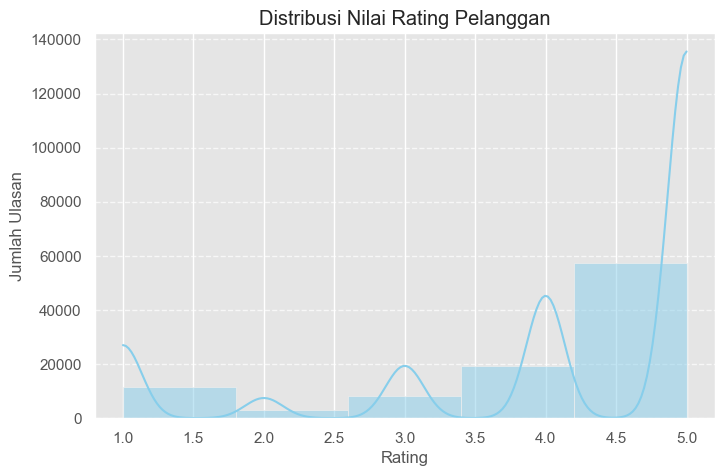

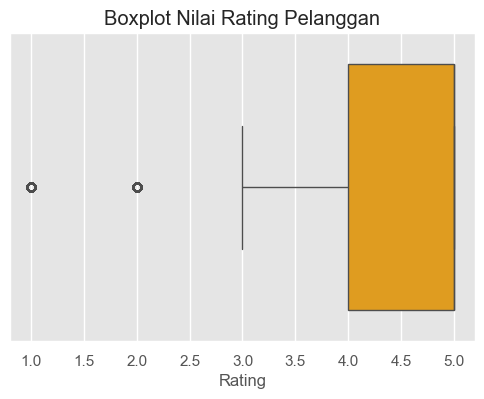

In [19]:
import seaborn as sns

# Histogram Distribusi Rating
plt.figure(figsize=(8, 5))
sns.histplot(df_order_reviews['review_score'], bins=5, kde=True, color='skyblue')

plt.title("Distribusi Nilai Rating Pelanggan")
plt.xlabel("Rating")
plt.ylabel("Jumlah Ulasan")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_order_reviews['review_score'], color='orange')

plt.title("Boxplot Nilai Rating Pelanggan")
plt.xlabel("Rating")
plt.show()

**Insight:**
- Pertanyaan yang saya lontarkan adalah ini, Bagaimana distribusi nilai rating pelanggan? Apakah ada outlier pada rating?

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Dari grafik line chart, terlihat bahwa jumlah pesanan mengalami peningkatan signifikan dari waktu ke waktu, terutama mulai awal 2017 hingga akhir 2018. Tren ini menunjukkan bahwa platform e-commerce mengalami pertumbuhan dalam jumlah transaksi, dengan lonjakan yang tajam di beberapa periode tertentu. Setelah mencapai puncaknya, jumlah pesanan cenderung stabil dengan sedikit fluktuasi.
- Conclution pertanyaan 2
Dari histogram, mayoritas pelanggan memberikan rating tinggi, terutama rating 5, yang mendominasi jumlah ulasan. Sebagian kecil pelanggan memberikan rating rendah (1 dan 2), tetapi jumlahnya jauh lebih sedikit dibandingkan rating tinggi. Boxplot menunjukkan adanya outlier pada rating 1 dan 2, yang menandakan ada sejumlah kecil pelanggan yang sangat tidak puas dengan layanan atau produk. Secara keseluruhan, rating pelanggan lebih condong ke positif, menunjukkan bahwa sebagian besar pelanggan puas dengan pengalaman mereka.